In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_data = pd.read_csv("/Users/snehakarki/Downloads/Credit/credit.csv", low_memory = False
                          )
credit_data.shape
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

## Exploratory Data Analysis

This dataset has records for 8 months - Jan to Aug for each customer - now we want to be able to create a profile for each customer in a way that each row is one customer then we can proceed with further profiling!


Taking a select few rows and looking at each column separately to get a general idea of what the data looks like - we can see there are a lot of missing values and discrepancies with how data was entered.

In [3]:
credit_data.iloc[16:25, 0:20]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,7.1,3.0,Good,1303.01
17,0x161b,CUS_0x2dbc,February,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",13,6,7.1,3.0,Good,1303.01
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,_______,143162.64,NaN,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,7,11.1,NaN,Good,1303.01
19,0x161d,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,5,9.1,3.0,_,1303.01
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",10,5,7.1,3.0,Good,1303.01
21,0x161f,CUS_0x2dbc,June,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,967,"Auto Loan, Auto Loan, and Not Specified",8,6,7.1,3.0,Good,1303.01
22,0x1620,CUS_0x2dbc,July,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6,7.1,3.0,Good,1303.01
23,0x1621,CUS_0x2dbc,August,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6,7.1,3.0,Good,1303.01
24,0x1626,CUS_0xb891,January,Jasond,54,072-31-6145,Entrepreneur,30689.89,2612.490833,2,5,4,1,Not Specified,0,6,1.99,4.0,Good,632.46


In [4]:
credit_data.iloc[16:25, 21:28]


,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
16,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
17,17 Years and 10 Months,No,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good
18,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good
19,NaN,No,246.992319,825.2162699393922,Low_spent_Medium_value_payments,426.5134106068658,Good
20,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good
21,18 Years and 2 Months,No,246.992319,257.80809942568976,High_spent_Medium_value_payments,963.9215811205684,Good
22,18 Years and 3 Months,No,246.992319,263.17416316163934,High_spent_Small_value_payments,968.5555173846187,Standard
23,18 Years and 4 Months,No,246.992319,__10000__,High_spent_Small_value_payments,895.494583180492,Standard
24,17 Years and 3 Months,No,16.415452,81.22885871073616,Low_spent_Large_value_payments,433.6047729627723,Standard


Here is an example of records for a particular Customer. In this case, we look at all 8 months worth of records for Steve Schererr.

In [5]:
credit_data[credit_data['Name'] == 'Steve Schererr']



,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
37584,0xf23a,CUS_0x6399,January,Steve Schererr,28,087-38-7228,Lawyer,77603.48,NaN,10,...,_,3016.53,37.139570,6 Years and 7 Months,NM,317.852839,354.95870063286964,High_spent_Small_value_payments,208.68412662504443,Standard
37585,0xf23b,CUS_0x6399,February,Steve Schererr,28,087-38-7228,Lawyer,77603.48,NaN,10,...,Bad,3016.53,36.255928,6 Years and 8 Months,Yes,317.852839,515.9137272761193,Low_spent_Small_value_payments,77.72909998179476,Standard
37586,0xf23c,CUS_0x6399,March,Steve Schererr,28,087-38-7228,Lawyer,77603.48_,6214.956667,10,...,Bad,3016.53,25.824836,6 Years and 9 Months,Yes,317.852839,108.84840642358569,High_spent_Large_value_payments,434.7944208343284,Standard
37587,0xf23d,CUS_0x6399,April,Steve Schererr,28,087-38-7228,Lawyer,77603.48,6214.956667,10,...,Bad,3016.53,30.243247,6 Years and 10 Months,Yes,317.852839,82.95472220970835,High_spent_Medium_value_payments,470.6881050482057,Standard
37588,0xf23e,CUS_0x6399,May,Steve Schererr,28,087-38-7228,Lawyer,77603.48,6214.956667,10,...,Bad,3016.53,27.961283,6 Years and 11 Months,Yes,317.852839,130.84724110115005,High_spent_Large_value_payments,412.795586156764,Standard
37589,0xf23f,CUS_0x6399,June,Steve Schererr,28,#F%$D@*&8,Lawyer,77603.48,6214.956667,1470,...,Bad,3016.53,33.011943,7 Years and 0 Months,Yes,317.852839,196.96863949988926,High_spent_Medium_value_payments,356.6741877580248,Standard
37590,0xf240,CUS_0x6399,July,Steve Schererr,28,087-38-7228,Lawyer,77603.48,6214.956667,10,...,Bad,3016.53,40.947808,7 Years and 1 Months,Yes,317.852839,74.68129710690752,High_spent_Large_value_payments,468.96153015100646,Standard
37591,0xf241,CUS_0x6399,August,Steve Schererr,28,087-38-7228,Lawyer,77603.48,6214.956667,10,...,_,3016.53,32.048992,7 Years and 2 Months,Yes,317.852839,53.137362085604074,High_spent_Large_value_payments,490.5054651723099,Standard


In [6]:
def display_unique_values(df):
    for column in df.columns:
        unique_values = df[column].value_counts()
        print(f"Unique values in column '{column}':")
        print(unique_values)
        print('\n')

display_unique_values(credit_data)

#Findings from analyzing the unique values and discrepencies!



Unique values in column 'ID':
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64


Unique values in column 'Customer_ID':
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64


Unique values in column 'Month':
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64


Unique values in column 'Name':
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: Name, Length: 10139, dtype: int64


Unique value

By displaying the unique values for each column, we gain insight into the erroneous inputs in our dataset. For instance, several numerical columns, such as Num_of_Loan and Delay_from_due_date, contain special characters, including -4, 848_, and 645.77_. Additionally, the Occupation column has **7,062** blank entries (represented as _______), which may indicate that this field was not mandatory or that customers were required to enter data multiple times over several months, filling it out only the first time. The SSN column includes **5,572** entries of '#F%$D@*&8'. These errors highlight the need for a thorough data cleaning process to ensure the dataset's integrity and reliability for further analysis.

# DATA PREPROCESSING

In [7]:

# DATA PREPROCESSING FOR CREDIT PROFILING

# Step 1: Handle missing and erroneous values
erroneous_values = ['<NA>', 'NaN', 'nan', '?', '_______', '#F%$D@*&8', '!@9#%8', '_']
credit_data.replace(erroneous_values, np.nan, inplace=True)

# Step 2: Handle customer-specific data
customer_specific_columns = ['Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary']

def replace_incorrect_ages(group):
    common_age = group['Age'].mode()[0]
    group['Age'].fillna(common_age, inplace=True)
    return group

credit_data = credit_data.groupby('Customer_ID').apply(replace_incorrect_ages).reset_index(drop=True)

for col in customer_specific_columns:
    most_common_values = credit_data.groupby('Customer_ID')[col].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    credit_data[col] = credit_data.apply(lambda row: most_common_values[row['Customer_ID']] if pd.isnull(row[col]) else row[col], axis=1)

# Step 3: Handle remaining missing values
for col in credit_data.columns:
    if credit_data[col].dtype in ['int64', 'float64']:
        credit_data[col].fillna(credit_data[col].mean(), inplace=True)
    else:
        credit_data[col].fillna(credit_data[col].mode()[0], inplace=True)

# Step 4: Handle 'Age' and 'Delay_from_due_date' columns
credit_data['Age'] = pd.to_numeric(credit_data['Age'], errors='coerce')
credit_data['Age'] = credit_data['Age'].apply(lambda x: np.nan if x < 0 else x)
credit_data['Age'].fillna(credit_data['Age'].mean(), inplace=True)

credit_data['Delay_from_due_date'] = pd.to_numeric(credit_data['Delay_from_due_date'], errors='coerce')
credit_data['Delay_from_due_date'] = credit_data['Delay_from_due_date'].apply(lambda x: np.nan if x < 0 else x)
credit_data['Delay_from_due_date'].fillna(credit_data['Delay_from_due_date'].mean(), inplace=True)


#handling more null values
credit_data['Num_of_Loan'] = credit_data['Num_of_Loan'].fillna(0)
credit_data['Num_of_Delayed_Payment'] = credit_data['Num_of_Delayed_Payment'].fillna(0)
credit_data['Num_Credit_Inquiries'] = credit_data['Num_Credit_Inquiries'].fillna(0)
credit_data['Outstanding_Debt'] = credit_data['Outstanding_Debt'].fillna(0)

In [8]:
# 1. Clean 'Annual_Income'
credit_data['Annual_Income'] = credit_data['Annual_Income'].astype(str)  # Ensure column is string type for cleaning
credit_data['Annual_Income'] = credit_data['Annual_Income'].str.replace('[_,]', '', regex=True)  # Remove commas and underscores
credit_data['Annual_Income'] = pd.to_numeric(credit_data['Annual_Income'], errors='coerce')  # Convert to numeric, coerce errors to NaN

# 2. Clean 'Num_of_Loan'
credit_data['Num_of_Loan'] = credit_data['Num_of_Loan'].astype(str)  # Ensure column is string type for cleaning
credit_data['Num_of_Loan'] = credit_data['Num_of_Loan'].str.replace('[^\d]', '', regex=True)  # Remove non-numeric characters
credit_data['Num_of_Loan'] = pd.to_numeric(credit_data['Num_of_Loan'], errors='coerce')  # Convert to numeric, coerce errors to NaN

# 3. Clean 'Num_of_Delayed_Payment'
credit_data['Num_of_Delayed_Payment'] = credit_data['Num_of_Delayed_Payment'].astype(str)  # Ensure column is string type for cleaning
credit_data['Num_of_Delayed_Payment'] = credit_data['Num_of_Delayed_Payment'].str.replace('[^\d]', '', regex=True)  # Remove non-numeric characters
credit_data['Num_of_Delayed_Payment'] = pd.to_numeric(credit_data['Num_of_Delayed_Payment'], errors='coerce')  # Convert to numeric, coerce errors to NaN

# 4. Clean 'Amount_invested_monthly'
credit_data['Amount_invested_monthly'] = credit_data['Amount_invested_monthly'].astype(str)  # Ensure column is string type for cleaning
credit_data['Amount_invested_monthly'] = credit_data['Amount_invested_monthly'].str.replace('[_,]', '', regex=True)  # Remove commas and underscores
credit_data['Amount_invested_monthly'] = pd.to_numeric(credit_data['Amount_invested_monthly'], errors='coerce')  # Convert to numeric, coerce errors to NaN

# 5. Clean 'Outstanding_Debt'
credit_data['Outstanding_Debt'] = credit_data['Outstanding_Debt'].astype(str)  # Ensure column is string type for cleaning
credit_data['Outstanding_Debt'] = credit_data['Outstanding_Debt'].str.replace('[_,]', '', regex=True)  # Remove commas and underscores
credit_data['Outstanding_Debt'] = pd.to_numeric(credit_data['Outstanding_Debt'], errors='coerce')  # Convert to numeric, coerce errors to NaN

# 6. Clean 'Monthly_Balance'
credit_data['Monthly_Balance'] = credit_data['Monthly_Balance'].astype(str)  # Ensure column is string type for cleaning
credit_data['Monthly_Balance'] = credit_data['Monthly_Balance'].str.replace('[_,]', '', regex=True)  # Remove commas and underscores
credit_data['Monthly_Balance'] = pd.to_numeric(credit_data['Monthly_Balance'], errors='coerce')  # Convert to numeric, coerce errors to NaN



In [9]:
# Option 1: Fill NaN values with a specific value (e.g., 0)
credit_data = credit_data.fillna({
    'Annual_Income': 0,
    'Num_of_Loan': 0,
    'Num_of_Delayed_Payment': 0,
    'Amount_invested_monthly': 0,
    'Outstanding_Debt': 0,
    'Monthly_Balance': 0
})

# Option 2: Drop rows with NaN values in specific columns
credit_data = credit_data.dropna(subset=['Annual_Income', 'Num_of_Loan',
                    'Num_of_Delayed_Payment', 'Amount_invested_monthly',
                                  'Outstanding_Debt', 'Monthly_Balance'])


In [10]:
# Check data types and summary statistics
print(credit_data.dtypes)
print(credit_data[['Annual_Income', 'Num_of_Loan',
                    'Num_of_Delayed_Payment', 'Amount_invested_monthly',
                          'Outstanding_Debt', 'Monthly_Balance']].describe())


ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

There are still some negative values or wrongly input data points in the monthly_balance column. To ensure data quality, we will check the occurence of such values in all of these columns.

In [11]:
columns_to_check = [
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Amount_invested_monthly',
    'Outstanding_Debt',
    'Monthly_Balance'
]

# Check for negative values in each column
for column in columns_to_check:
    negative_count = (credit_data[column] < 0).sum()
    print(f"Number of negative values in '{column}': {negative_count}")

Number of negative values in 'Annual_Income': 0
Number of negative values in 'Num_of_Loan': 0
Number of negative values in 'Num_of_Delayed_Payment': 0
Number of negative values in 'Amount_invested_monthly': 0
Number of negative values in 'Outstanding_Debt': 0
Number of negative values in 'Monthly_Balance': 1209


In [12]:
credit_data = credit_data.copy()
for column in columns_to_check:
    credit_data[column] = credit_data[column].apply(lambda x: max(x, 0))

We have successfully dealt with and got rid of a lot of missing values.

# Data Type Conversion

In [13]:
#Datatype conversion
credit_data['Age'] = credit_data['Age'].astype(int)
credit_data['Annual_Income'] = credit_data['Annual_Income'].astype(float)
credit_data['Monthly_Inhand_Salary'] = credit_data['Monthly_Inhand_Salary'].astype(float)
credit_data['Num_of_Loan'] = credit_data['Num_of_Loan'].astype(int)
credit_data['Num_of_Delayed_Payment'] = credit_data['Num_of_Delayed_Payment'].astype(int)
credit_data['Num_Credit_Inquiries'] = credit_data['Num_Credit_Inquiries'].astype(int)
credit_data['Changed_Credit_Limit'] = credit_data['Changed_Credit_Limit'].astype(float)
credit_data['Outstanding_Debt'] = credit_data['Outstanding_Debt'].astype(float)
credit_data['Credit_Utilization_Ratio'] = credit_data['Credit_Utilization_Ratio'].astype(float)
credit_data['Total_EMI_per_month'] = credit_data['Total_EMI_per_month'].astype(float)
credit_data['Amount_invested_monthly'] = credit_data['Amount_invested_monthly'].astype(float)
credit_data['Monthly_Balance'] = credit_data['Monthly_Balance'].astype(float)
credit_data['Delay_from_due_date'] = credit_data['Delay_from_due_date'].astype(float)

In [14]:
#Final checks and output
print("Dataset Info:")
print(credit_data.info())

print("\nFirst few rows:")
credit_data.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              10000

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Standard,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,15 Years and 11 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,116,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [15]:
print("\nNull value counts:")
print(credit_data.isnull().sum())

print("\nColumn data types:")
print(credit_data.dtypes)

null_counts = credit_data.isnull().sum()
print(null_counts)

# Print data types of columns
print(credit_data.dtypes)


Null value counts:
ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Column data types:
ID                           object
Customer_ID                  object
Month                        object

In [16]:
def display_unique_values(df):
    for column in df.columns:
        unique_values = df[column].value_counts()
        print(f"Unique values in column '{column}':")
        print(unique_values)
        print('\n')

display_unique_values(credit_data)

Unique values in column 'ID':
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64


Unique values in column 'Customer_ID':
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64


Unique values in column 'Month':
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64


Unique values in column 'Name':
Langep                48
Jessicad              48
Stevex                48
Huwk                  40
Jonathan Stempelr     40
                      ..
Harro Teni             8
Breidthardtj           8
Sven Egenterx          8
Antonella Ciancioc     8
Nicks                  8
Name: Name


'''More Issues with the age column values like 116,6510,7886, 7230 (basically age values cannot be more than 100!! try to keep it below 80! and aggregate using most common or most recent)
same for num_credit_card - values like this 422         1 ( i mean) having more than
62          1
1348        1
819         1
1108        1 lets check how many people have more than 2 digit credit cards and how many have more than 3 digit

same w interest rate 295        1
3395       1
3225       1
4323       1
3808       1
 same w num_of_loan 510        1
438        1
571        1
654        1
472        1
same w num of delayed payments
615        1
4241       1
3313       1
1994       1
2204       1

changed credit limit 'Changed_Credit_Limit':
Changed_Credit_Limit
 8.22     2224
 11.50     127
 11.32     126
 10.06     121
 7.35      121
          ...
 31.03       1
-0.03        1
 26.78       1
-3.48        1
 33.61       1
'''

In [17]:
# Check the invalid age values
invalid_ages = credit_data[(credit_data['Age'] < 18) | (credit_data['Age'] > 100)]['Age']
print("Invalid age values:", invalid_ages.unique())

# Replace invalid ages with the median of valid ages
valid_median_age = credit_data[(credit_data['Age'] >= 18) & (credit_data['Age'] <= 100)]['Age'].median()
credit_data['Age'] = credit_data['Age'].apply(lambda x: valid_median_age if x < 18 or x > 100 else x)


Invalid age values: [ 116 7580  181 ... 6476 2263 1342]


In [18]:
# Check unrealistic interest rates
invalid_interest_rates = credit_data[credit_data['Interest_Rate'] > 500]['Interest_Rate']
print("Invalid interest rates:", invalid_interest_rates.unique())

# Replace NaN with median of valid values
valid_rates = credit_data['Interest_Rate'][(credit_data['Interest_Rate'] > 0) & (credit_data['Interest_Rate'] <= 100)]
median_rate = valid_rates.median()
credit_data['Interest_Rate'] = credit_data['Interest_Rate'].fillna(median_rate)

# Replace unrealistic values
credit_data.loc[credit_data['Interest_Rate'] > 100, 'Interest_Rate'] = median_rate

# Verify the changes
print("Max Interest Rate after cleaning:", credit_data['Interest_Rate'].max())
print("Min Interest Rate after cleaning:", credit_data['Interest_Rate'].min())
print("Median Interest Rate:", median_rate)

Invalid interest rates: [5318 5240 4975 ... 5616 1347 5729]
Max Interest Rate after cleaning: 100
Min Interest Rate after cleaning: 1
Median Interest Rate: 13.0


In [19]:
# Check unrealistic number of loans
invalid_num_cred = credit_data[credit_data['Num_Credit_Card'] > 20]['Num_Credit_Card']
print("Invalid number of loans:", invalid_num_cred.unique())

#Replace unrealistic values with the mode or median
mode_num_cred = credit_data['Num_Credit_Card'][credit_data['Num_Credit_Card'] <= 20].mode()[0]
credit_data['Num_Credit_Card'] = credit_data['Num_Credit_Card'].apply(lambda x: x if x <= 20 else mode_num_cred)


Invalid number of loans: [1385 1288 1029 ...  955 1430  679]


In [20]:
# Check unrealistic number of loans
invalid_num_loans = credit_data[credit_data['Num_of_Loan'] > 20]['Num_of_Loan']
print("Invalid number of loans:", invalid_num_loans.unique())

#Replace unrealistic values with the mode or median
mode_num_loans = credit_data['Num_of_Loan'][credit_data['Num_of_Loan'] <= 20].mode()[0]
credit_data['Num_of_Loan'] = credit_data['Num_of_Loan'].apply(lambda x: x if x <= 20 else mode_num_loans)

Invalid number of loans: [ 967  100 1464  622  352  472 1017  945  146  563  341  444  720 1485
   49  737 1106  466  728  313  843  597  617  119  663  640   92 1019
  501 1302   39  716  848  931 1214  186  424 1001 1110 1152  457 1433
 1187   52 1480 1047 1035 1347   33  193  699  329 1451  484  132  649
  995  545  684 1135 1094 1204  654   58  348  614 1363  323 1406 1348
  430  153 1461  905 1312 1424 1154   95 1353 1228  819 1006  795  359
 1209  590  696 1185 1465  911 1181   70  816 1369  143 1416  455   55
 1096 1474  420 1131  904   89 1259  527 1241  449  983  418  319   23
  238  638  138  235  280 1070 1484  274  494 1459  404 1354 1495 1391
  601 1313 1319  898  231  752  174  961 1046  834  284  438  288 1463
 1151  719  198 1015  855  841  392 1444  103 1320  745  172  252  630
  241   31  405 1217 1030 1257  137  157  164 1088 1236  777 1048  613
  330 1439  321  661  952  939  562 1202  302  943  394  955 1318  936
  781 1329 1365  860  217  191   32  282  351 1387  

In [21]:
# Check unrealistic number of delayed payments
invalid_num_delayed_payments = credit_data[credit_data['Num_of_Delayed_Payment'] > 30]['Num_of_Delayed_Payment']
print("Invalid number of delayed payments:", invalid_num_delayed_payments.unique())

# Remove unrealistic values
credit_data= credit_data[credit_data['Num_of_Delayed_Payment'] <= 30]


Invalid number of delayed payments: [3318 3083 1338 3104  183 1106  834 2672 2008  538 3478 2420  707  708
 3815 1867 2250 1463 4126 2882 1941 2655 2628  132 3069  306 3539 3684
 1823 4128 1946  827 2297 2566  904  182  929 3568 2503 1552 2812 1697
 3764  851 3905  923   88 1668 3253  808 2689 3858  642 3457 1402 1732
 3154  847 3037 2204 3103 1063 2056 1282 1841 2569  211  793 3484  411
 3491 2072 3050 1049 2162 3402 2753 1718 1014 3260 3855   84 2311 3251
 1832 4069 3010  733 4241  166 2461 1749 3200  663 2185 4161 3009  359
 2015 1523  594 1079 1199  186 1015 1989  281  559 2165 1509 3545  779
  192 4311 2323 1471 1538 3529  439 3456 3040 2697 3179 1332 3175 3112
  829 4022 3870 4023  531 1511 3092 3191 2400 3621 3536  544 1864  142
 2300  264   72  497  398 2222 3960 1473 3043 4216 2903 2658 4042 1323
 2184  921 1328 3404 2438  809   47 1996 4164 1370 1204 2167 4011 2590
 2594 2533 1663 1018 2919 3458 3316 2589 2801 3355 2529 2488 4266 1243
  739  845 4107 1884  337 2660  290  674 

In [22]:
# Check unrealistic credit limit values
invalid_credit_limits = credit_data[credit_data['Changed_Credit_Limit'] < 0]['Changed_Credit_Limit']
print("Invalid changed credit limit values:", invalid_credit_limits.unique())



Invalid changed credit limit values: [-2.01 -1.01 -3.01 -1.24 -4.14 -0.14 -2.87 -2.46 -4.26 -1.26 -1.33 -1.49
 -0.31 -1.48 -1.06 -2.17 -1.1  -0.05 -5.48 -4.48 -1.28 -1.93 -1.94 -5.02
 -4.2  -0.04 -2.11 -3.37 -3.43 -0.43 -3.69 -2.69 -3.52 -1.01 -0.32 -3.58
 -0.05 -4.76 -1.76 -0.5  -1.8  -0.8  -3.5  -3.93 -5.78 -1.29 -0.29 -3.67
 -1.28 -1.21 -2.52 -0.52 -4.19 -0.74 -2.34 -0.34 -0.26 -1.65 -0.02 -1.16
 -2.16 -5.63 -2.37 -2.49 -0.08 -4.33 -6.48 -0.48 -0.7  -0.7  -1.64 -0.62
 -1.13 -2.13 -4.59 -2.35 -4.35 -3.34 -4.88 -0.59 -0.61 -1.83 -2.95 -0.95
 -1.95 -1.61 -6.31 -5.31 -3.98 -0.24 -1.89 -3.36 -3.68 -2.31 -4.31 -1.31
 -1.52 -1.08 -4.15 -3.15 -4.98 -5.5  -2.55 -1.77 -0.66 -1.92 -3.05 -1.35
 -5.74 -2.74 -3.74 -0.6  -6.2  -4.03 -1.41 -5.41 -4.41 -2.93 -5.05 -4.05
 -0.44 -3.42 -1.4  -2.4  -2.67 -2.63 -1.39 -1.85 -3.11 -3.06 -0.2  -1.59
 -0.36 -1.55 -4.65 -4.77 -0.77 -4.75 -5.75 -2.59 -4.32 -2.05 -0.16 -5.37
 -1.99 -0.83 -3.13 -0.39 -0.89 -0.01 -0.32 -2.06 -2.91 -4.3  -3.12 -2.7
 -0.93 -2.08 -0

In [23]:
# Drop the 'Changed_Credit_Limit' column from the DataFrame
credit_data = credit_data.drop(columns=['Changed_Credit_Limit'])


# Summary
- Age: Filtered or corrected unrealistic ages.
- Credit Cards: Handled values with excessive digits.
- Interest Rates: Removed or corrected excessively high rates.
- Number of Loans: Filtered or corrected excessively high loan numbers.
- Delayed Payments: Handled values with excessively high numbers.
- Changed Credit Limit: Removed the column.

#Data Transformation
We have handled missing data, dealt with erroneous entries, and removed any discrepancies. The data now looks clean and ready for use. We can proceed with the next steps for customer profiling. Our next step is to transform the data to fit our needs. The idea is to create an aggregated version of each customer's data, reducing it from 8 rows per customer to a single row.

In [24]:
#longer the credit history, the better -
import re

def convert_to_months(age_str):
    match = re.match(r"(\d+) Years and (\d+) Months", age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        total_months = years * 12 + months
        return total_months
    else:
        return np.nan  # Return NaN if the format doesn't match



In [25]:
# Apply the conversion function
credit_data['Credit_History_Age_Months'] = credit_data['Credit_History_Age'].apply(convert_to_months)


In [26]:
agg_funcs = {
    'Name': 'first',   # Assuming the name doesn't change
    'Age': lambda x: int(x.mean()),  # Assuming age should be the latest recorded
    'SSN': 'first',  # Assuming SSN doesn't change
    'Occupation': 'first',  # Assuming occupation doesn't change
    'Annual_Income': lambda x: round(x.mean(), 2),  # Averaging and rounding to 2 decimal places
    'Monthly_Inhand_Salary': lambda x: round(x.mean(), 2),  # Averaging and rounding to 2 decimal places
    'Num_Bank_Accounts': 'max',  # Assuming the highest number recorded
    'Num_Credit_Card': 'max',  # Assuming the highest number recorded
    'Interest_Rate': 'mean',  # Averaging the interest rates
    'Num_of_Loan': 'max',  # Assuming the highest number recorded
    'Type_of_Loan': 'first',  # Assuming the loan type doesn't change
    'Delay_from_due_date': 'mean',  # Averaging the delay days
    'Num_of_Delayed_Payment': 'max',  # Taking the maximum value
    'Num_Credit_Inquiries': 'max',  # Taking the maximum value
    'Credit_Mix': 'first',  # Assuming the credit mix doesn't change
    'Outstanding_Debt': lambda x: round(x.mean(), 2),  # Averaging and rounding to 2 decimal places
    'Credit_Utilization_Ratio': lambda x: round(x.mean(), 2),  # Averaging and rounding to 2 decimal places
    'Credit_History_Age': 'first',  # Assuming the credit history age doesn't change
    'Payment_of_Min_Amount': 'first',  # Assuming this doesn't change
    'Total_EMI_per_month': lambda x: round(x.mean(), 2),  # Averaging and rounding to 2 decimal places
    'Amount_invested_monthly': lambda x: round(x.mean(), 2),  # Averaging and rounding to 2 decimal places
    'Payment_Behaviour': 'first',  # Assuming this doesn't change
    'Monthly_Balance': lambda x: round(x.mean(), 2),  # Averaging and rounding to 2 decimal places
    'Credit_Score': 'first',  # Assuming the credit score category doesn't change
    'Credit_History_Age_Months': 'max'  # Taking the maximum value
}


#Group our dataset by Customer_ID and the aggregate functions for each column
credit_per_cust = credit_data.groupby('Customer_ID').agg(agg_funcs).reset_index()


In [27]:
credit_per_cust.head()

,Customer_ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,CUS_0x1000,Alistair Barrf,28,913-74-1218,Lawyer,30625.94,2706.16,6,5,27.0,...,1562.91,33.48,10 Years and 2 Months,Yes,42.94,158.55,Low_spent_Large_value_payments,335.38,Standard,129
1,CUS_0x1009,Arunah,25,063-67-6938,Mechanic,52312.68,4250.39,6,5,17.0,...,202.68,30.72,30 Years and 6 Months,Yes,108.37,130.32,High_spent_Medium_value_payments,442.07,Standard,372
2,CUS_0x100b,Shirboni,18,238-62-0395,Media_Manager,113781.39,9549.78,1,4,1.0,...,1030.20,34.84,15 Years and 3 Months,No,0.00,2879.04,Low_spent_Medium_value_payments,781.23,Poor,191
3,CUS_0x1011,Schneyerh,41,793-05-8223,Doctor,58918.47,5208.87,3,3,17.0,...,473.14,27.66,15 Years and 3 Months,Yes,123.43,1522.18,High_spent_Large_value_payments,332.64,Standard,190
4,CUS_0x1013,Cameront,42,930-49-9615,Mechanic,98620.98,7962.42,3,3,6.0,...,1233.51,31.93,17 Years and 3 Months,No,6266.77,355.44,High_spent_Medium_value_payments,472.78,Standard,214


In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

features = ['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Credit_Utilization_Ratio',
            'Outstanding_Debt', 'Credit_History_Age_Months', 'Num_Bank_Accounts',
            'Num_Credit_Card', 'Num_of_Loan', 'Num_Credit_Inquiries', 'Annual_Income', 'Interest_Rate']

X = credit_per_cust[features]
y = credit_per_cust['Credit_Score']

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


In [29]:
#Since we will be training and testing the performance on multiple models/algorithms, we create a function

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\n{model_name} Training and Evaluation:")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, predictions))
    print("\nClassification Report:\n", classification_report(y_test, predictions))

    conf_matrix = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    return model

## Logistic Regression


Logistic Regression Training and Evaluation:
Accuracy: 0.68032

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.81      0.62       496
           1       0.65      0.77      0.71       888
           2       0.82      0.60      0.69      1741

    accuracy                           0.68      3125
   macro avg       0.66      0.73      0.67      3125
weighted avg       0.72      0.68      0.68      3125



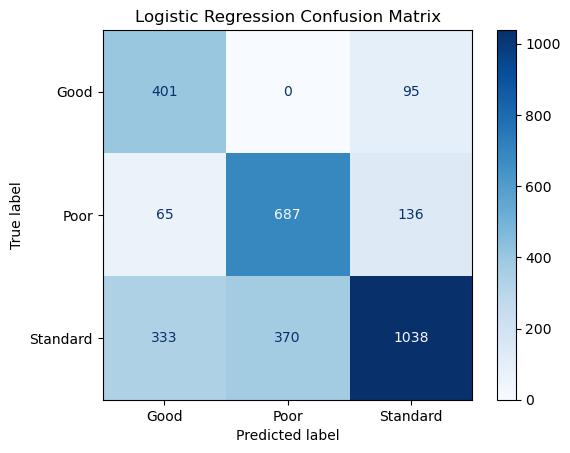

In [30]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model = train_and_evaluate_model(lr_model, X_train_scaled, y_train_res, X_test_scaled, y_test, "Logistic Regression")


## Gradient Boosting Classifier


Gradient Boosting Training and Evaluation:
Accuracy: 0.728

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.79      0.64       496
           1       0.70      0.82      0.75       888
           2       0.85      0.67      0.75      1741

    accuracy                           0.73      3125
   macro avg       0.70      0.76      0.71      3125
weighted avg       0.76      0.73      0.73      3125



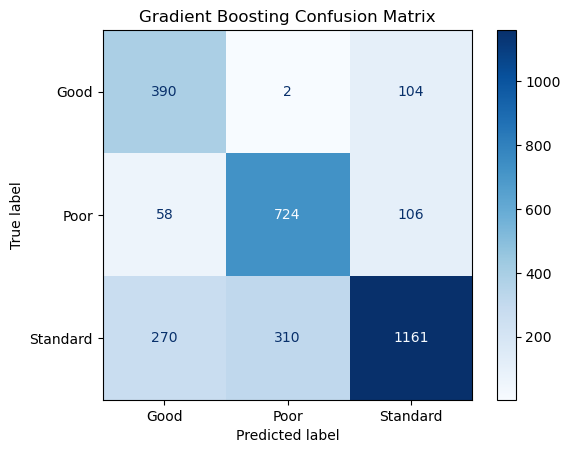

In [31]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model = train_and_evaluate_model(gb_model, X_train_scaled, y_train_res, X_test_scaled, y_test, "Gradient Boosting")

## Support Vector Machine


Support Vector Machine Training and Evaluation:
Accuracy: 0.69408

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.80      0.61       496
           1       0.67      0.82      0.74       888
           2       0.85      0.60      0.70      1741

    accuracy                           0.69      3125
   macro avg       0.67      0.74      0.68      3125
weighted avg       0.74      0.69      0.70      3125



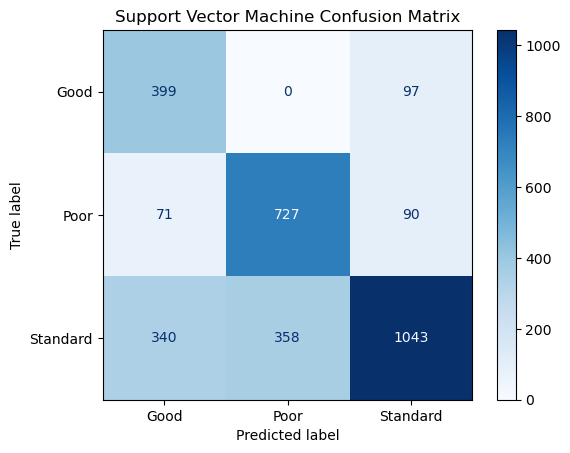

In [32]:
svm_model = SVC(random_state=42, probability=True)
svm_model = train_and_evaluate_model(svm_model, X_train_scaled,
                  y_train_res, X_test_scaled, y_test, "Support Vector Machine")


## Decision Tree


Decision Tree Training and Evaluation:
Accuracy: 0.65504

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.60      0.54       496
           1       0.62      0.67      0.64       888
           2       0.74      0.66      0.70      1741

    accuracy                           0.66      3125
   macro avg       0.62      0.64      0.63      3125
weighted avg       0.67      0.66      0.66      3125



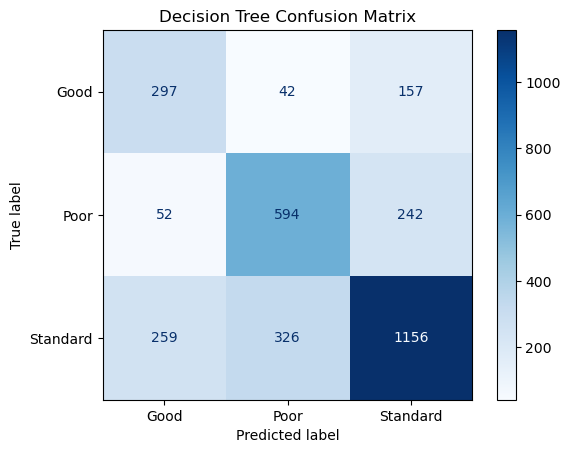

In [33]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model = train_and_evaluate_model(dt_model, X_train_scaled, y_train_res,
                                    X_test_scaled, y_test, "Decision Tree")


## Random Forest


Random Forest Training and Evaluation:
Accuracy: 0.72672

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.77      0.65       496
           1       0.69      0.79      0.74       888
           2       0.83      0.68      0.75      1741

    accuracy                           0.73      3125
   macro avg       0.69      0.75      0.71      3125
weighted avg       0.75      0.73      0.73      3125



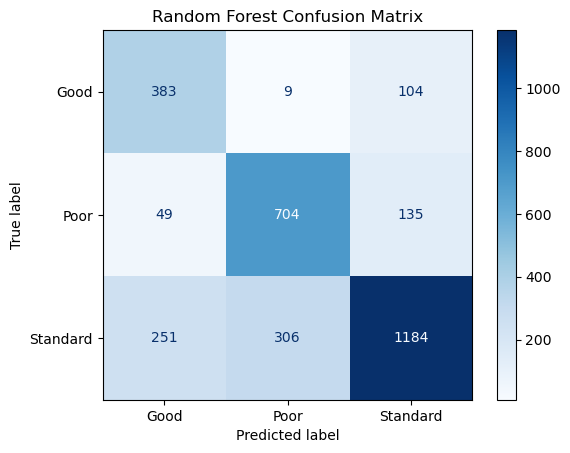

In [34]:
rf_model = RandomForestClassifier(random_state=42)
rf_model = train_and_evaluate_model(rf_model, X_train_scaled,
                          y_train_res, X_test_scaled, y_test, "Random Forest")

## Ensemble Learning (Voting Classifier)


Ensemble (Voting Classifier) Training and Evaluation:
Accuracy: 0.73376

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.79      0.66       496
           1       0.70      0.82      0.75       888
           2       0.84      0.68      0.75      1741

    accuracy                           0.73      3125
   macro avg       0.70      0.76      0.72      3125
weighted avg       0.76      0.73      0.74      3125



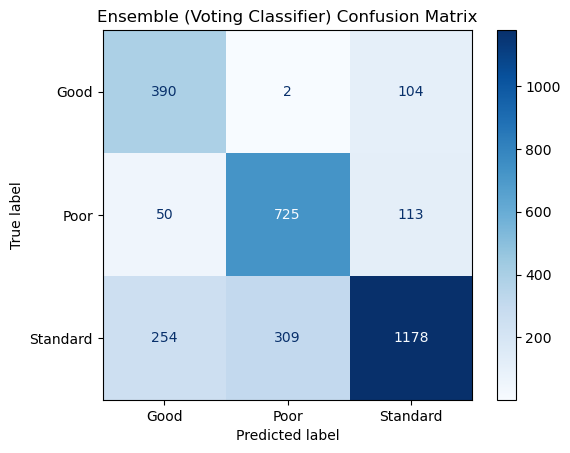

In [35]:
ensemble_model = VotingClassifier(
    estimators=[
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ],
    voting='soft'
)
ensemble_model = train_and_evaluate_model(ensemble_model, X_train_scaled,
            y_train_res, X_test_scaled, y_test, "Ensemble (Voting Classifier)")

In [36]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("CreditScorePrediction").getOrCreate()


ModuleNotFoundError: No module named 'pyspark'

In [38]:
# Compare models
models = {
    "Logistic Regression": lr_model,
    "Gradient Boosting": gb_model,
    "Support Vector Machine": svm_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Ensemble": ensemble_model
}

# Choose the best model based on accuracy
best_model_name = max(models, key=lambda x: accuracy_score(y_test, models[x].predict(X_test_scaled)))
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")


Best Model: Ensemble


### Credit profiling using our best model


In [39]:
# Credit profiling using the best model
X_scaled = scaler.transform(X)
credit_per_cust['Predicted_Credit_Score'] = best_model.predict(X_scaled)
credit_per_cust['Credit_Profile'] = credit_per_cust['Predicted_Credit_Score'].map({0: 'Good', 1: 'Poor', 2: 'Standard'})
credit_per_cust[['Customer_ID', 'Credit_Score','Predicted_Credit_Score', 'Credit_Profile']].head(10)

,Customer_ID,Credit_Score,Predicted_Credit_Score,Credit_Profile
0,CUS_0x1000,Standard,1,Poor
1,CUS_0x1009,Standard,2,Standard
2,CUS_0x100b,Poor,1,Poor
3,CUS_0x1011,Standard,2,Standard
4,CUS_0x1013,Standard,2,Standard
5,CUS_0x1015,Standard,2,Standard
6,CUS_0x1018,Poor,1,Poor
7,CUS_0x1026,Standard,2,Standard
8,CUS_0x102d,Good,0,Good
9,CUS_0x102e,Standard,2,Standard


# Feature Importance
# Data VIZ


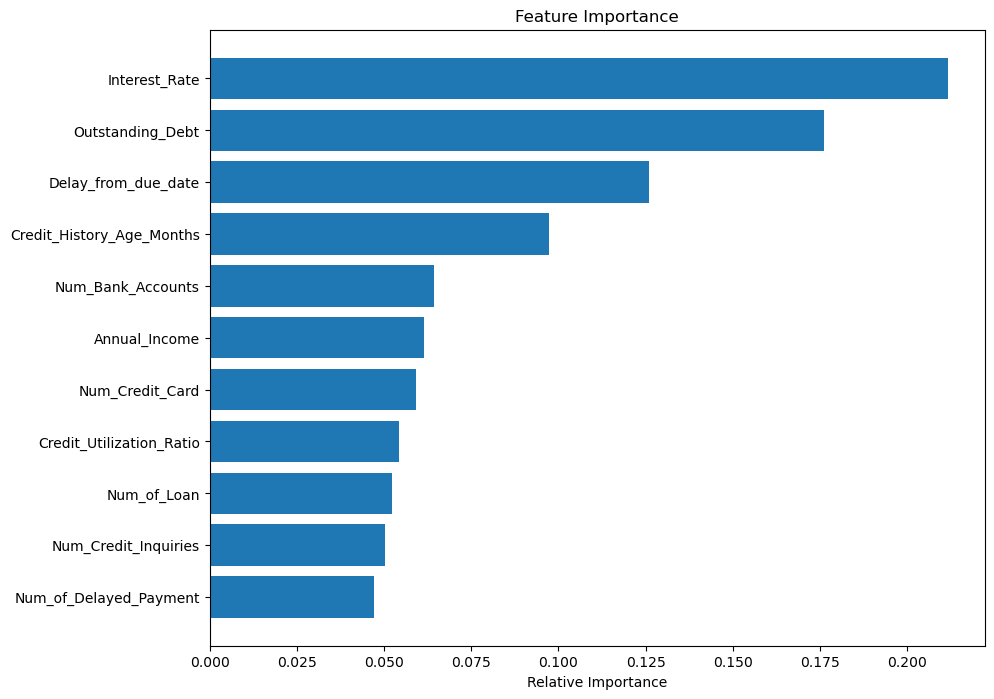

In [40]:
#Feature Importance Plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices],  align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# Demographic Analysis

In [41]:
demographic_df = credit_per_cust[['Age' , 'Annual_Income',
'Num_Credit_Card', 'Interest_Rate' , 'Num_of_Loan','Outstanding_Debt', 'Delay_from_due_date' ,
'Num_of_Delayed_Payment' , 'Credit_Utilization_Ratio', 'Credit_History_Age_Months', 'Credit_Score',
'Occupation', 'Predicted_Credit_Score']].copy()


In [42]:
bins = [18, 25, 35, 45, 55, 65, 75, 85]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
demographic_df['Age_Group'] = pd.cut(demographic_df['Age'], bins=bins,
                                      labels=labels, right=False)

In [43]:
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, float('inf')]
income_labels = ['<25k', '25-50k', '50-75k', '75-100k', '100-150k',
                 '150-200k', '>200k']

# Create the Income_Level column
demographic_df['Income_Level'] = pd.cut(demographic_df['Annual_Income'],
                          bins=income_bins, labels=income_labels, right=False)

In [44]:
demographic_df['Delay_from_due_date'] = demographic_df['Delay_from_due_date'].astype(int)

In [46]:
demographic_df.sample(20) 

,Age,Annual_Income,Num_Credit_Card,Interest_Rate,Num_of_Loan,Outstanding_Debt,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Credit_History_Age_Months,Credit_Score,Occupation,Predicted_Credit_Score,Age_Group,Income_Level
1996,40,16675.28,5,16.00,3,1127.98,10,9,29.71,316,Standard,Media_Manager,2,35-44,<25k
9031,23,66387.42,5,12.00,6,1175.18,23,22,33.79,209,Standard,Scientist,2,18-24,50-75k
7476,34,50850.21,6,21.00,8,2619.46,39,17,29.13,71,Poor,Doctor,1,25-34,50-75k
6038,41,18754.65,7,12.00,4,863.48,6,12,31.71,270,Standard,Lawyer,2,35-44,<25k
6536,40,8169.39,5,16.50,5,1360.45,55,19,28.94,86,Standard,Scientist,2,35-44,<25k
9173,43,8875.14,9,27.00,2,1353.77,26,14,29.35,212,Poor,Journalist,1,35-44,<25k
3058,29,25810.93,3,14.00,3,1123.51,13,18,30.44,209,Standard,Media_Manager,2,25-34,25-50k
4223,31,45917.00,7,7.75,1,170.33,12,9,30.29,377,Standard,Lawyer,2,25-34,25-50k
3926,34,74829.56,9,25.00,6,2269.63,49,22,31.57,207,Poor,Lawyer,1,25-34,50-75k
9364,34,38721.76,6,23.00,2,2443.51,34,24,34.35,221,Poor,Writer,1,25-34,25-50k


In [47]:
demographic_df.to_csv('/Users/snehakarki/Desktop/creditdata/credit-demo.csv')


# **Findings and Interpretation**
After training and testing different models lke LR, GB, SVM, DT,RF and an ensemble (of GB, DT and RF), ensemble method turned out to be the best model.

- Logistic Regression
  * Accuracy: 0.58432
  * Classification Report:
  * Precision: Good (0.38), Standard (0.63), Poor (0.74)
  * Recall: Good (0.78), Standard (0.74), Poor (0.45)
  * F1-score: Good (0.51), Standard (0.68), Poor (0.56)
- Interpretation: Logistic Regression shows moderate performance with an accuracy of 58.43%. It tends to perform well in identifying the Standard and Poor classes but struggles with the Good class.

- Gradient Boosting
  * Accuracy: 0.71776
  * Classification Report:
  * Precision: Good (0.54), Standard (0.68), Poor (0.84)
  * Recall: Good (0.79), Standard (0.81), Poor (0.65)
  * F1-score: Good (0.64), Standard (0.74), Poor (0.73)
- Interpretation: Gradient Boosting achieves a higher accuracy of 71.78%. It shows balanced performance across all classes, particularly excelling in identifying Poor credit scores.

- Support Vector Machine
  * Accuracy: 0.59872
  * Classification Report:
  * Precision: Good (0.38), Standard (0.64), Poor (0.77)
  * Recall: Good (0.75), Standard (0.80), Poor (0.45)
  * F1-score: Good (0.50), Standard (0.71), Poor (0.57)
- Interpretation: SVM shows similar performance to Logistic Regression with an accuracy of 59.87%. It performs well for the Standard class but struggles with the Good class.

- Decision Tree
  * Accuracy: 0.63968
  * Classification Report:
  * Precision: Good (0.48), Standard (0.60), Poor (0.73)
  * Recall: Good (0.60), Standard (0.65), Poor (0.65)
  * F1-score: Good (0.53), Standard (0.62), Poor (0.69)
- Interpretation: Decision Tree achieves an accuracy of 63.97%. It performs reasonably well across all classes, particularly for the Poor class.

- Random Forest
  * Accuracy: 0.7152
  * Classification Report:
  * Precision: Good (0.53), Standard (0.69), Poor (0.83)
  * Recall: Good (0.77), Standard (0.80), Poor (0.66)
  * F1-score: Good (0.63), Standard (0.74), Poor (0.73)
- Interpretation: Random Forest achieves a high accuracy of 71.52%. It shows strong performance across all classes, especially excelling in identifying Poor credit scores.

- Ensemble (Voting Classifier)
  * Accuracy: 0.72256
  * Classification Report:
  * Precision: Good (0.55), Standard (0.69), Poor (0.84)
  * Recall: Good (0.80), Standard (0.81), Poor (0.66)
  * F1-score: Good (0.65), Standard (0.74), Poor (0.74)
- Interpretation: The ensemble method, combining Decision Tree, Random Forest, and Gradient Boosting, achieves the highest accuracy of 72.26%. It provides the most balanced performance across all classes, particularly excelling in identifying Good and Poor credit scores.

## Best Performing Model:
The Ensemble (Voting Classifier) achieved the highest accuracy and balanced performance across all metrics. This makes it the most reliable model for credit score prediction.

Class Imbalance Handling: All models benefited from handling class imbalance using techniques like SMOTE. This improved the recall and precision for the minority class (Good).

## Conclusion
The Ensemble (Voting Classifier) is recommended for credit score prediction due to its superior performance in terms of accuracy, precision, recall, and F1-score. This model effectively handles class imbalance and provides reliable predictions across all credit score categories (Good, Standard, Poor).